In [16]:
import re
from matplotlib import pyplot as plt

## Extracting pages

In [24]:
def selectFirstVersionForEachFord(paragraph: str) -> str:
    return re.sub(r'\((.+?)\|.+?\)', r'\1', paragraph)

def extractCodexPages(file) -> list[str]:
    END_PAGE = '79'
    paragraphs = []
    current_paragraph = ''
    
    for line in file:
        if line.strip().startswith("#") or len(line) < 2:
            continue

        last_character = line[-2]

        if last_character in ['-', '=']:
            current_paragraph += line[:-2]
        else:
            current_paragraph += line[:-1]

        if last_character == '=':
            paragraphs.append(selectFirstVersionForEachFord(current_paragraph.strip()))
            current_paragraph = ''

    return paragraphs

def extractWordsFromParagraph(paragraph: str) -> list[str]:
    return re.split(r'[\s,\.\[\]\{\}:;"]', paragraph)


# ------------------------------------- - ------------------------------------ #

def readCodex(path: str) -> list[str]:
    with open(path, 'r') as f:
        return list(map(extractWordsFromParagraph, extractCodexPages(f)))


In [26]:
for p in readCodex('FSG.txt'):
    print(p)

['FGAG2', 'GDAE', 'AR', 'GHAM', 'SOE', 'SORG', '0D0RC2', 'GDOR', 'SOE8G2ORG', 'DZAR', 'ORG', 'DAIR', 'THAM', 'SOR', 'AR', 'HZAR', 'HZAR', '8ALA2GAIIR', 'SCDG', 'OR', 'GDAM', 'SO8', 'HZOARG', 'HZC2', '8ARAM', '2G0OM', 'OHCCG', 'OHCAR', 'ROEOHG', 'HZAAR', '8AM', 'ODAM', 'OR', 'ODAL2AIRG', 'TCAR', 'HZAM', 'PZAR', 'FZAM']
['G8ARAISG']
['O8AR', 'SG', 'SOE', 'PZOG', 'OG8AR', 'S', '2', 'FZOAM', 'SO8ARGGSCG', 'SO8G', 'ODTO', 'G', 'OHTOE', 'TOHZG', 'O2TG', '8AN', 'TOR', 'DO28AM', 'SOR', 'FZOE', 'SO8G']
['8AN', '02', 'HCO8G']
['G8AN', 'PZC2AM', 'OE2', 'PZCG', 'GHAN', 'SOSG', 'PZO8AEC2ODSO', 'DSOG', 'OHAIRN', 'OHCOE', 'ODAL', 'SO8AN', '2DZCG', '8AMSOG', 'DZCG', 'DO8AM', 'PZG', 'PZ08AIIE2', 'HZCG', 'SC', 'OE8AN', '88AN', 'OM', 'TOE', 'O8AM', 'TO8AN', 'T8G', 'ODON', '80R', 'HZG', 'DO88AM', 'SDZCG', 'DZOR', 'TOR', 'SCG', 'DOE', 'TOE', 'TOE', 'DOR', 'TOESO', 'TOE', 'SO8AL', 'DSG', 'DTG', '8OR', 'TO8AM', 'SO', 'DOCAKGTO', 'HTCG', 'TCDAN', 'SCO', 'PSOE', '8G8G8', 'HZG', '8AIHZGGHO', 'SOE', 'SC', 'DO8SC

## Counting N-Grams

In [27]:
def countNGrams(text: list[str], n: int) -> dict[str, int]:
    ngrams = {}

    for paragraph in text:
        for i in range(len(paragraph) - n + 1):
            ngram = ' '.join(paragraph[i:i+n])
            if ngram not in ngrams:
                ngrams[ngram] = 0
            ngrams[ngram] += 1

    return ngrams

In [28]:
def getSortedNGramsAndCalculateScores(ngrams: dict[str, int]) -> list[tuple[str, int]]:
    return list(map(lambda pair: (pair[1][0], pair[1][1], pair[0] / pair[1][1]), enumerate(sorted(ngrams.items(), key=lambda x: x[1], reverse=True))))

In [29]:
def getWordsGraph(text: list[str]) -> dict[str, set[str]]:
    graph = {}

    for paragraph in text:
        for i in range(len(paragraph) - 1):
            word = paragraph[i]
            next_word = paragraph[i+1]

            if word not in graph:
                graph[word] = set()
            graph[word].add(next_word)

In [30]:
print(countNGrams(readCodex('FSG.txt'), 1))

{'FGAG2': 1, 'GDAE': 14, 'AR': 219, 'GHAM': 43, 'SOE': 165, 'SORG': 4, '0D0RC2': 1, 'GDOR': 6, 'SOE8G2ORG': 1, 'DZAR': 2, 'ORG': 7, 'DAIR': 15, 'THAM': 4, 'SOR': 72, 'HZAR': 13, '8ALA2GAIIR': 1, 'SCDG': 31, 'OR': 238, 'GDAM': 38, 'SO8': 10, 'HZOARG': 1, 'HZC2': 2, '8ARAM': 3, '2G0OM': 1, 'OHCCG': 88, 'OHCAR': 5, 'ROEOHG': 1, 'HZAAR': 1, '8AM': 662, 'ODAM': 261, 'ODAL2AIRG': 1, 'TCAR': 46, 'HZAM': 10, 'PZAR': 5, 'FZAM': 2, 'G8ARAISG': 1, 'O8AR': 15, 'SG': 94, 'PZOG': 2, 'OG8AR': 1, 'S': 12, '2': 94, 'FZOAM': 1, 'SO8ARGGSCG': 1, 'SO8G': 39, 'ODTO': 7, 'G': 22, 'OHTOE': 18, 'TOHZG': 17, 'O2TG': 1, '8AN': 59, 'TOR': 196, 'DO28AM': 2, 'FZOE': 6, '02': 1, 'HCO8G': 8, 'G8AN': 4, 'PZC2AM': 1, 'OE2': 9, 'PZCG': 8, 'GHAN': 3, 'SOSG': 1, 'PZO8AEC2ODSO': 1, 'DSOG': 1, 'OHAIRN': 1, 'OHCOE': 28, 'ODAL': 1, 'SO8AN': 1, '2DZCG': 1, '8AMSOG': 1, 'DZCG': 30, 'DO8AM': 2, 'PZG': 10, 'PZ08AIIE2': 1, 'HZCG': 49, 'SC': 22, 'OE8AN': 1, '88AN': 1, 'OM': 13, 'TOE': 357, 'O8AM': 54, 'TO8AN': 2, 'T8G': 122, 'ODON

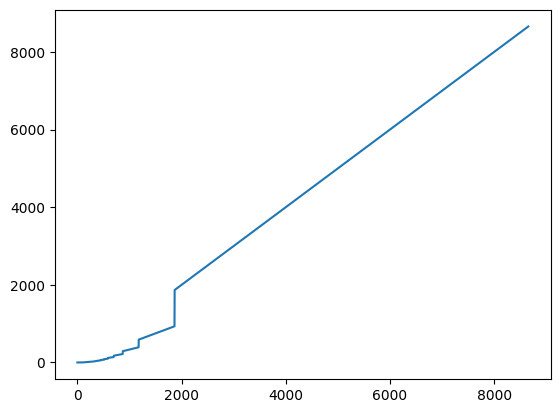

In [31]:
getSortedNGramsAndCalculateScores(countNGrams(readCodex('FSG.txt'), 1))

plt.plot(list(map(lambda x: x[2], getSortedNGramsAndCalculateScores(countNGrams(readCodex('FSG.txt'), 1)))))